### Estudiantes:

#### Leidis Lopez
#### Camilo Perez
#### Santago Muñoz

# Dataset de Biodegradabilidad QSAR

## Información General del Dataset

Este dataset de biodegradabilidad QSAR fue desarrollado por el Milano Chemometrics and QSAR Research Group de la Università degli Studi Milano – Bicocca, Milano, Italia.


## Propósito

Los datos han sido utilizados para desarrollar modelos QSAR (Relaciones Cuantitativas Estructura-Actividad) para el estudio de las relaciones entre la estructura química y la biodegradación de moléculas.

## Contenido del Dataset

- **Total de químicos:** 1,055 moléculas
- **Moléculas fácilmente biodegradables:** 356
- **Moléculas no fácilmente biodegradables:** 699
- **Fuente de datos:** Valores experimentales de biodegradación recopilados del sitio web del National Institute of Technology and Evaluation of Japan (NITE)

## Modelos de Clasificación

Se desarrollaron modelos de clasificación para discriminar entre moléculas fácilmente biodegradables y no fácilmente biodegradables utilizando tres métodos de modelado diferentes:

1. **k-Nearest Neighbours (k-NN)** - k Vecinos Más Cercanos
2. **Partial Least Squares Discriminant Analysis (PLS-DA)** - Análisis Discriminante de Mínimos Cuadrados Parciales
3. **Support Vector Machines (SVM)** - Máquinas de Vectores de Soporte

## Descriptores Moleculares

Los detalles sobre los atributos (descriptores moleculares) seleccionados en cada modelo pueden encontrarse en la siguiente referencia:

**Mansouri, K., Ringsted, T., Ballabio, D., Todeschini, R., Consonni, V. (2013).** *Quantitative Structure - Activity Relationship models for ready biodegradability of chemicals.* Journal of Chemical Information and Modeling, 53, 867-878.

## Aplicaciones

Este dataset es particularmente útil para:
- Desarrollo de modelos predictivos de biodegradabilidad
- Estudios de quimioinformática ambiental
- Investigación en relaciones estructura-actividad
- Evaluación de riesgos ambientales de sustancias químicas

# Análisis y Modelado de Biodegradabilidad QSAR con MLflow

## 1. Preprocesamiento de Datos

### Carga y Exploración Inicial
Se cargaron los datos del dataset de Biodegradabilidad QSAR y se realizó un análisis exploratorio de su estructura que incluyó:
- Número de columnas y registros
- Tipos de atributos (numéricos, categóricos)
- Identificación de datos faltantes
- Detección de filas duplicadas

### Transformación de Datos
- **Codificación de variable objetivo:** Los valores de la variable `Class` se transformaron a formato binario (0 y 1)
- **Escalado de características:** Se aplicó StandardScaler para normalizar los valores numéricos
- **División del dataset:** Se separaron los datos en conjuntos de entrenamiento y prueba

## 2. Configuración del Experimento en MLflow

Se creó el experimento en MLflow con el nombre: **"tracking regresion logistica & Red Neuronal"**

Este experimento permite el seguimiento centralizado de métricas, parámetros y modelos para ambos enfoques de modelado.

## 3. Modelo de Regresión Logística

### Configuración de Hiperparámetros
Se entrenó un modelo de regresión logística explorando diferentes combinaciones de hiperparámetros:

- **C:** 1, 50
- **max_iter:** 50, 100
- **solver:** 'liblinear', 'lbfgs'

### Seguimiento con Runs Anidados
Se implementaron **runs anidados** en MLflow para registrar cada configuración de hiperparámetros como subruns independientes, permitiendo una comparación detallada del rendimiento de cada combinación.

## 4. Red Neuronal con Keras

### Arquitectura del Modelo
Se diseñó un modelo secuencial con las siguientes capas:

- **Capa Dense:** 32 neuronas con activación 'relu'
- **BatchNormalization**
- **Dropout:** 0.5
- **Capa Dense:** 16 neuronas con activación 'relu'
- **BatchNormalization**
- **Dropout:** 0.5
- **Capa Dense de salida:** 1 neurona con activación 'sigmoid' para clasificación binaria

**Componentes clave:**
- **Capa de entrada:** 32 neuronas con activación ReLU
- **Normalización por lotes:** BatchNormalization para estabilizar el entrenamiento
- **Regularización:** Dropout del 50% para prevenir sobreajuste
- **Capa oculta:** 16 neuronas con activación ReLU
- **Capa de salida:** 1 neurona con activación sigmoid para clasificación binaria

### Configuración de Entrenamiento
- **Optimizador:** Adam con learning_rate de 0.001
- **Función de pérdida:** binary_crossentropy

### Autologging de MLflow
Se activó el **autologging** de MLflow, que proporciona:
- ✅ Registro automático de métricas durante el entrenamiento
- ✅ Captura de hiperparámetros del modelo
- ✅ Almacenamiento del modelo entrenado
- ✅ Configuración ultrarrápida sin necesidad de declaraciones de registro explícitas

Esta funcionalidad permite un seguimiento completo y automático del proceso de entrenamiento sin código adicional.


## Runs de ambos modelos
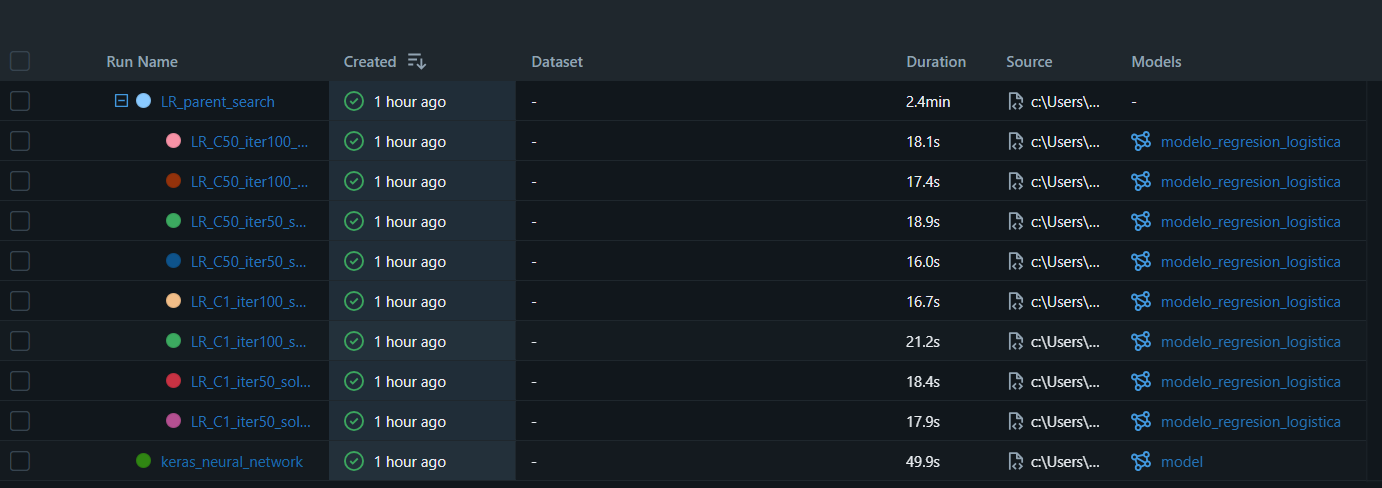

## Comparacion de metricas
## Acurracy
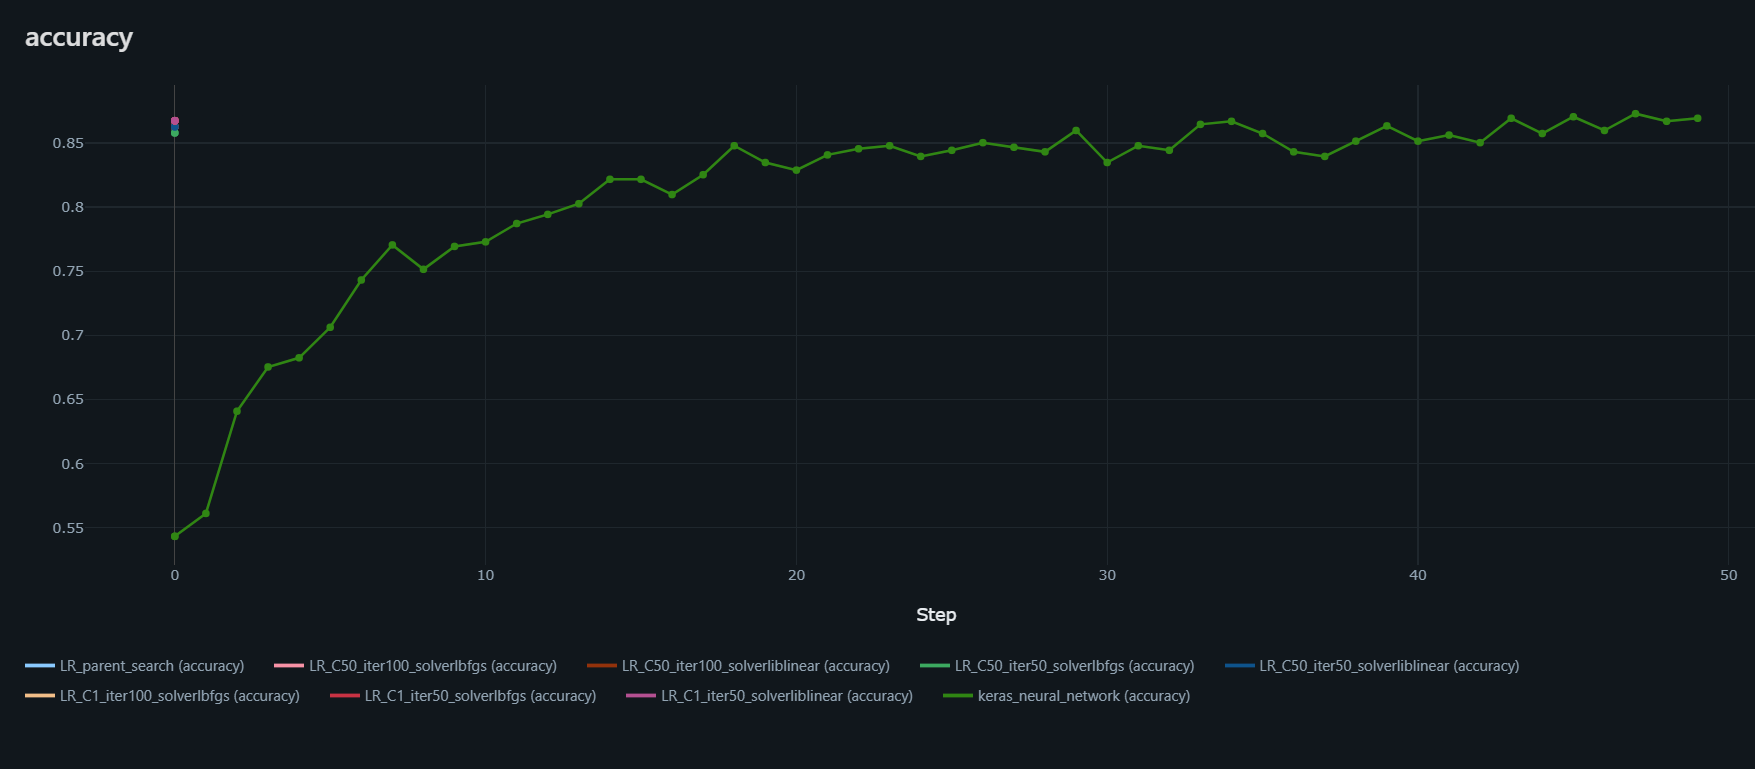


El accuracy para los diferentes runs de Regresion logistica se mantienen alrededor de 0.857 y 0.867 mientras que el modelo de red neuronal pasa de 0.543 a 0.869.

## ROC AUC
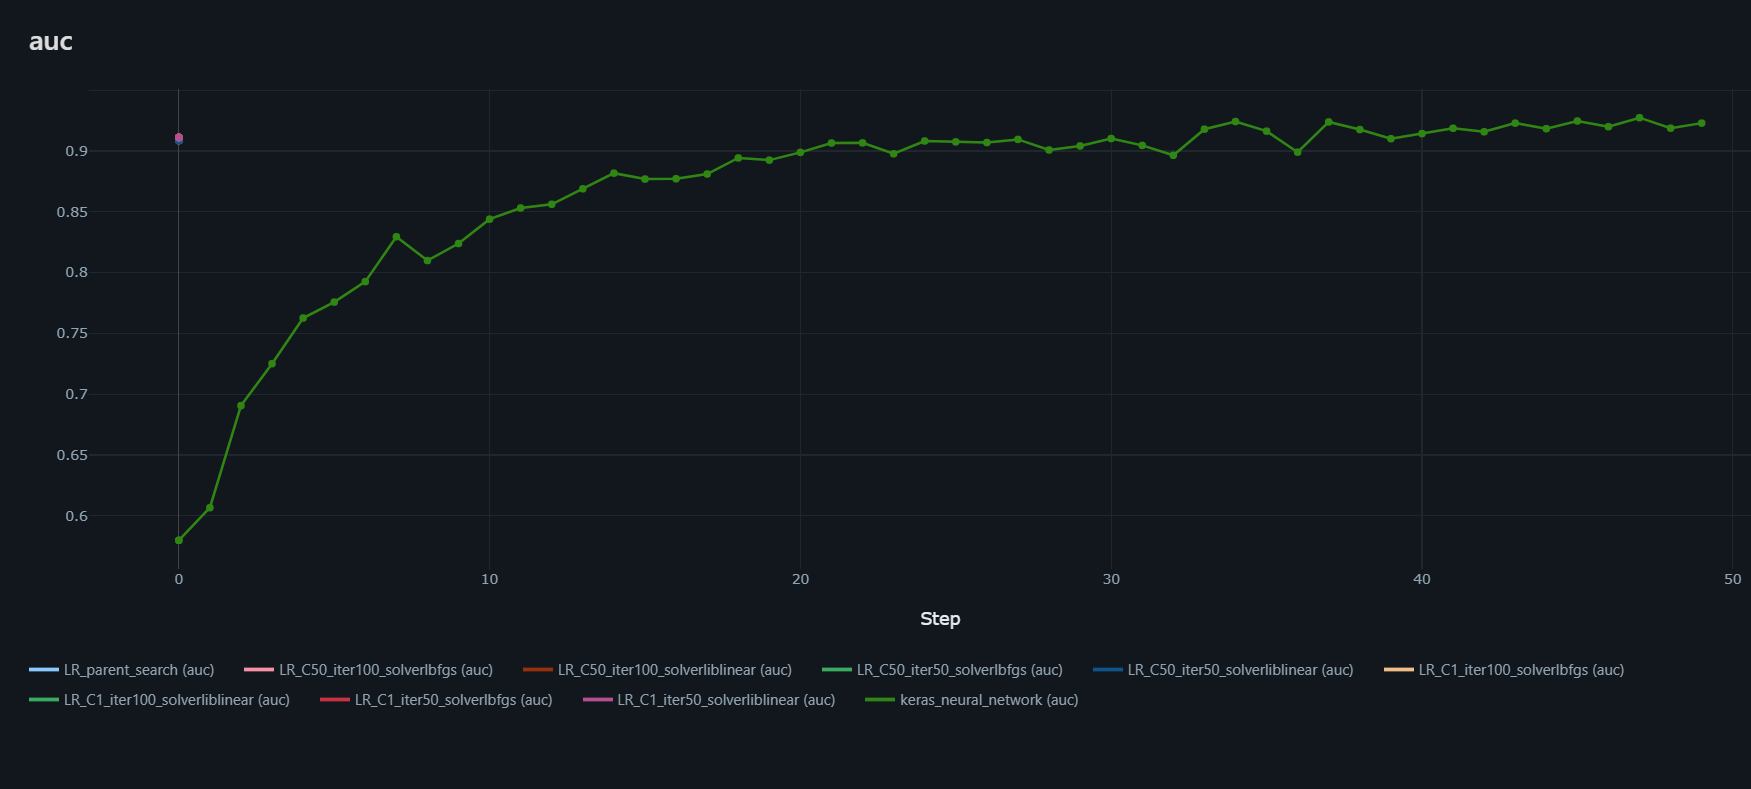

El auc para los diferentes runs de Regresion logistica se mantienen alrededor de 0.90 y 0.911 mientras que el modelo de red neuronal pasa de 0.57 a 0.92.

## recall
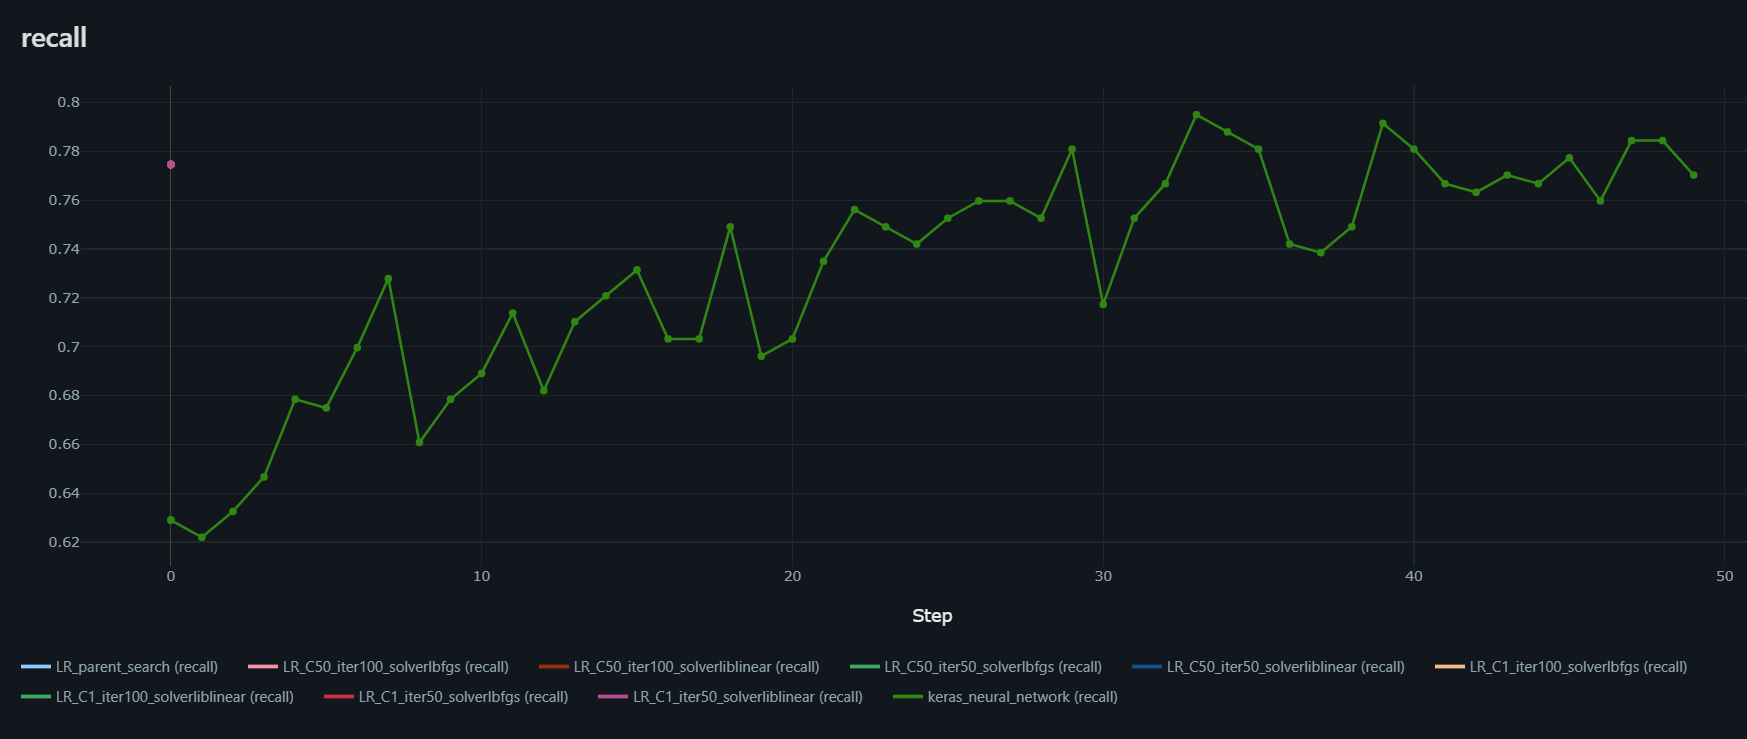

El auc para los diferentes runs de Regresion logistica fueron de 0.77 mientras que el modelo de red neuronal pasa de 0.62 a 0.77.

## f1-score 
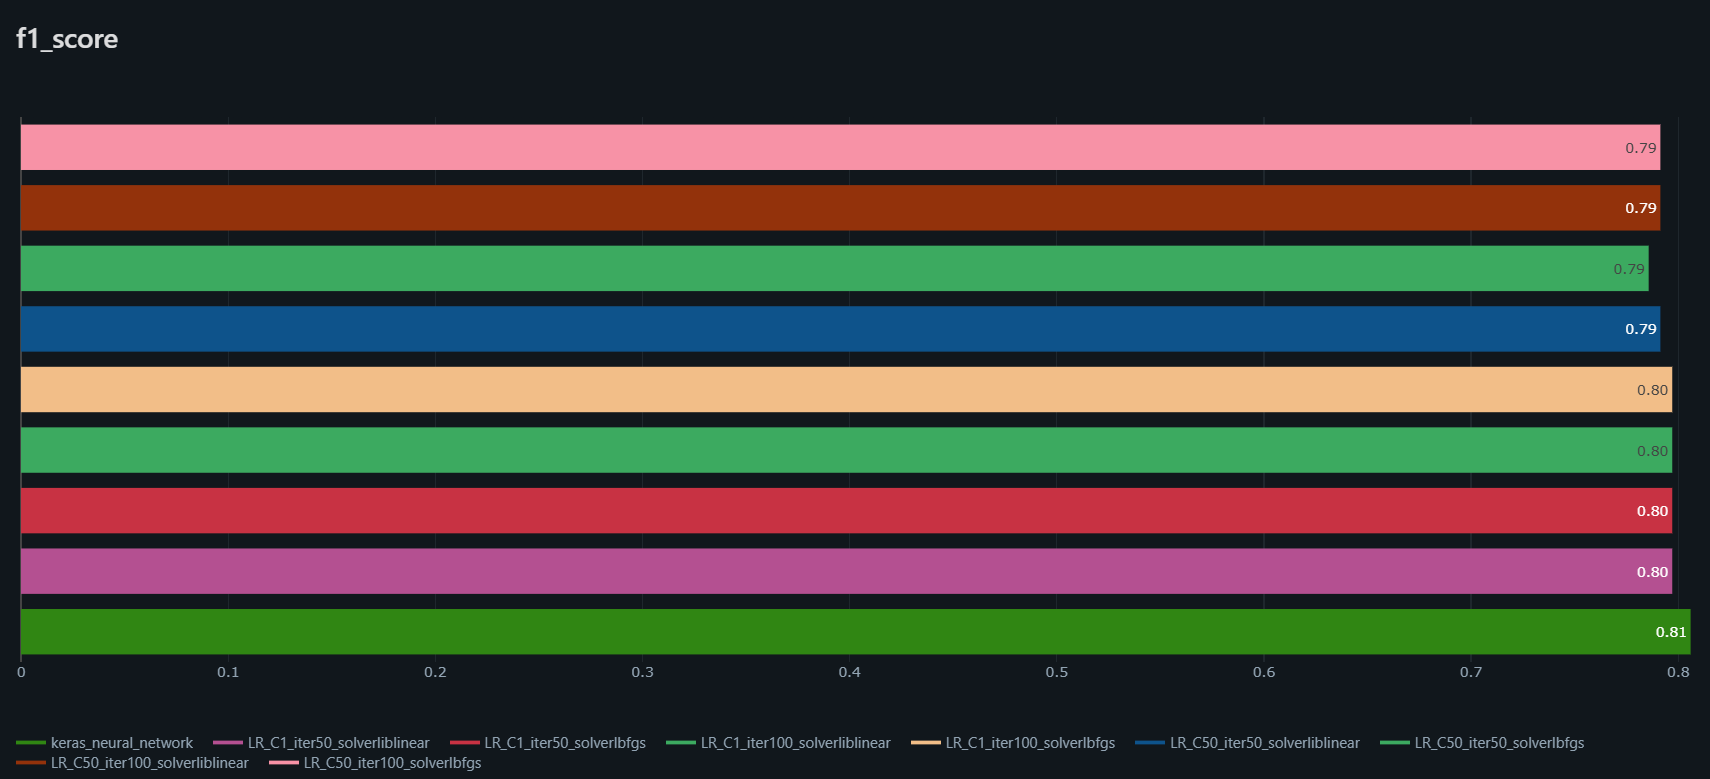

## precision 
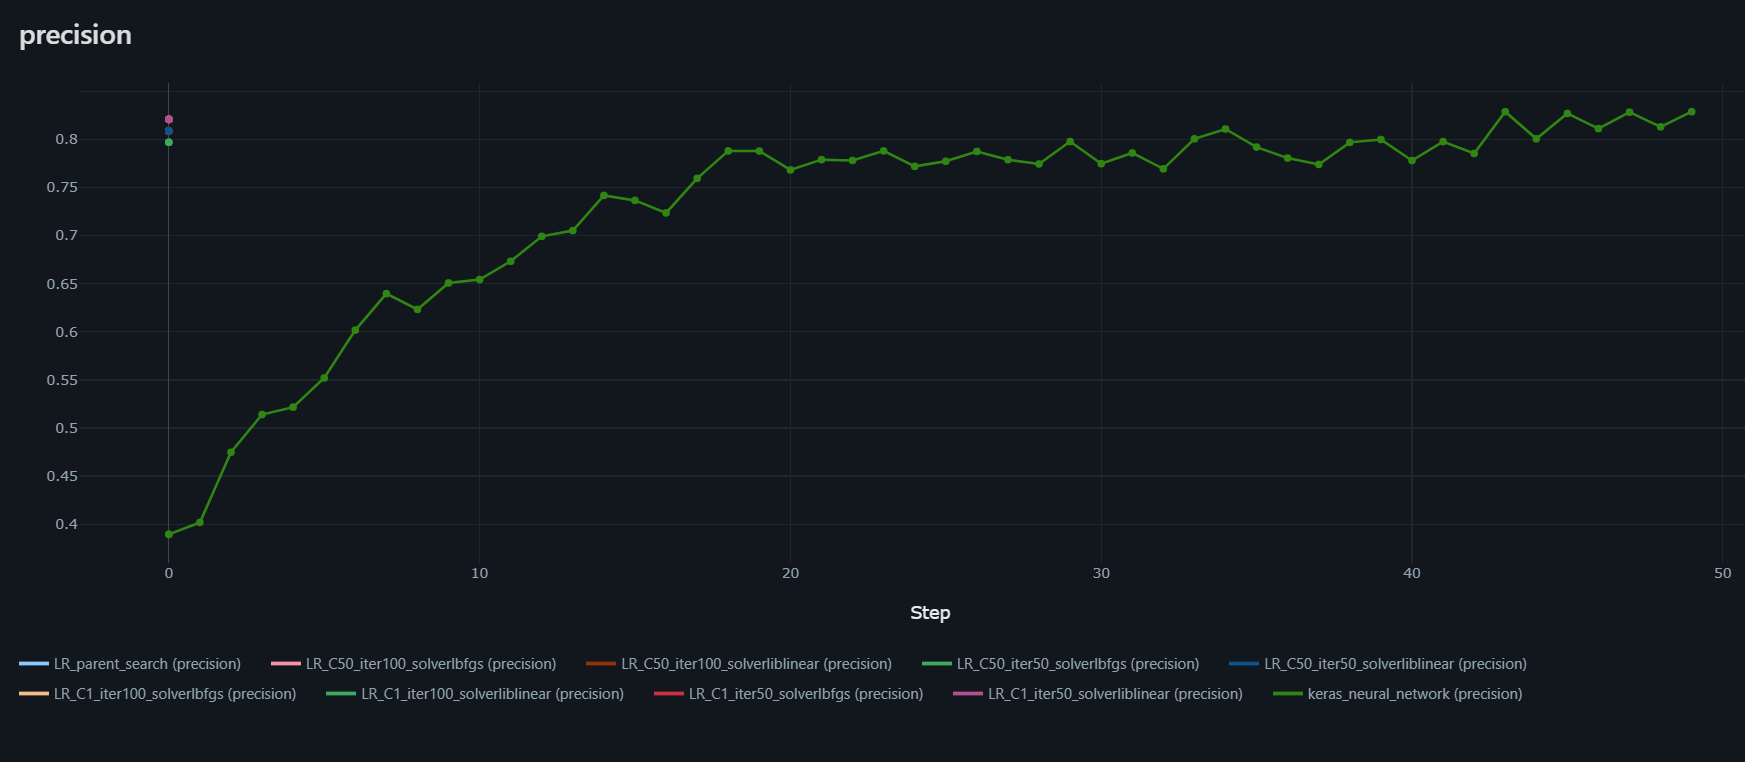

Precision para los diferentes runs de Regresion logistica se mantienen alrededor de 0.797 y 0.82 mientras que el modelo de red neuronal pasa de 0.389 a 0.828.


## Artefactos generados
### Regresion logistica
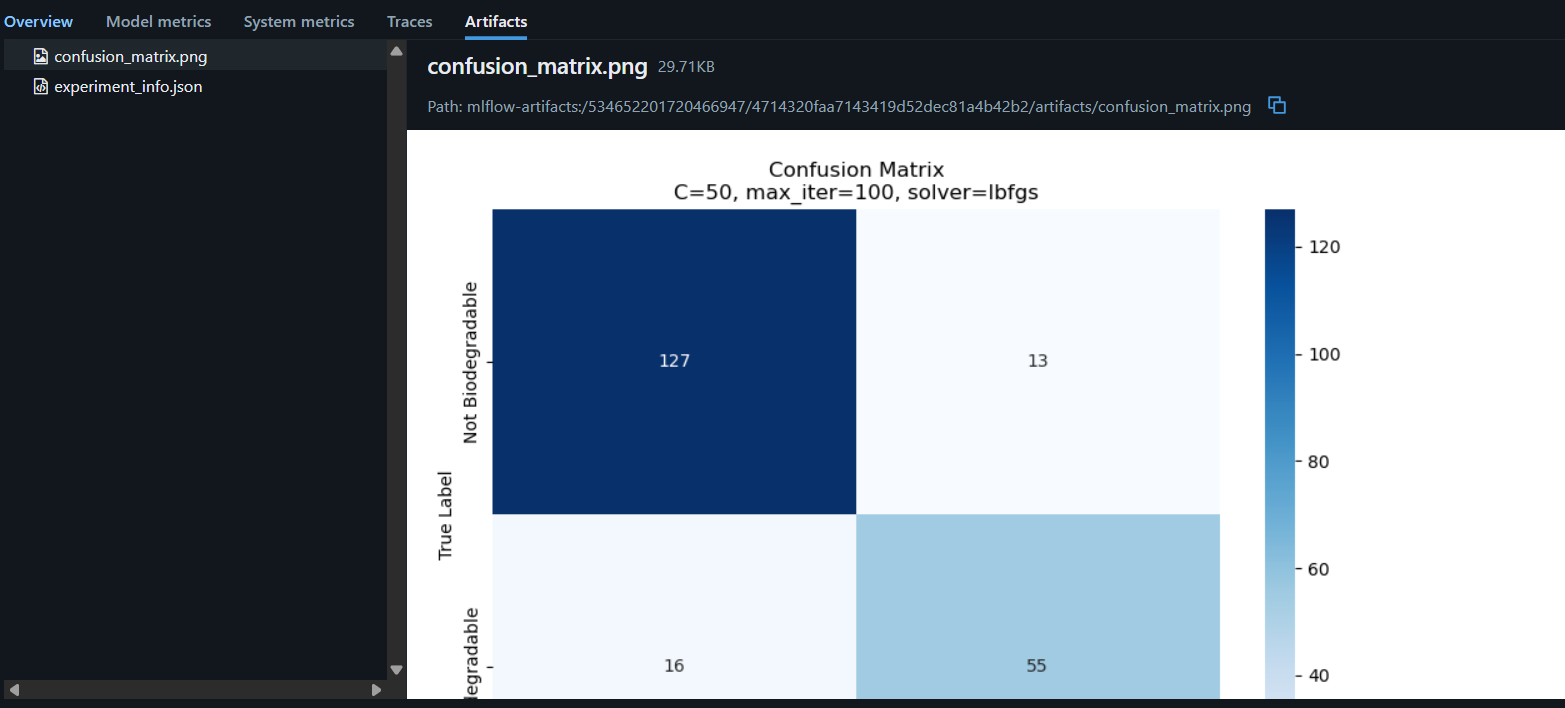
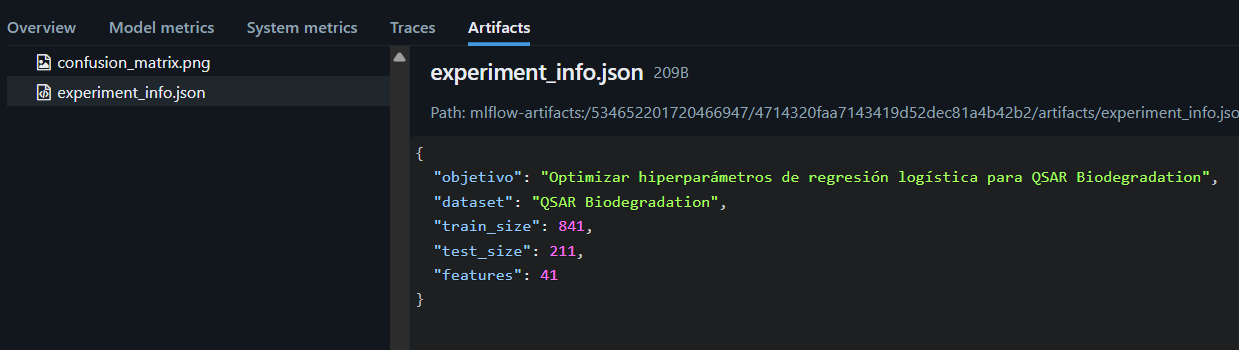

## Red neuronal
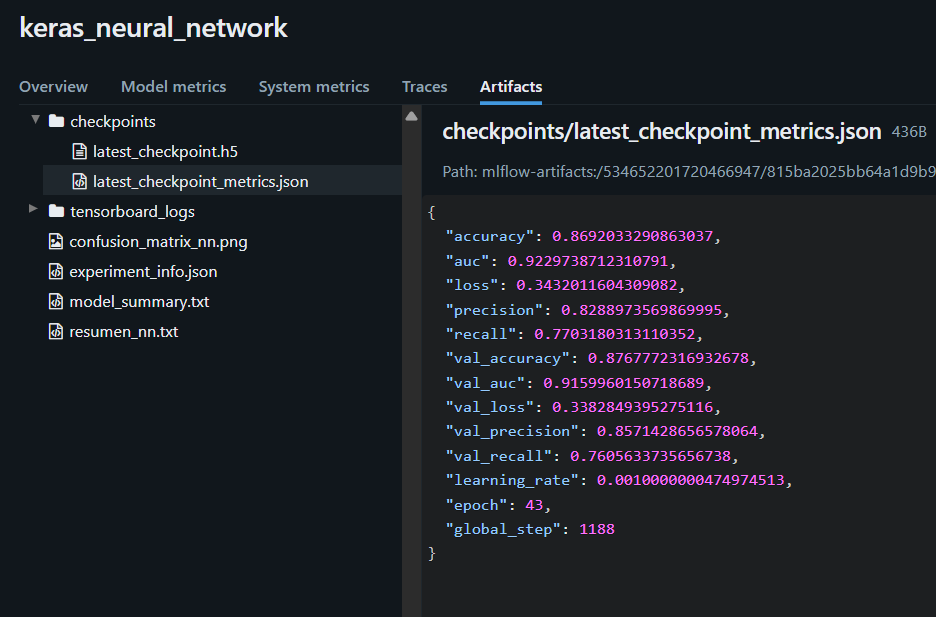
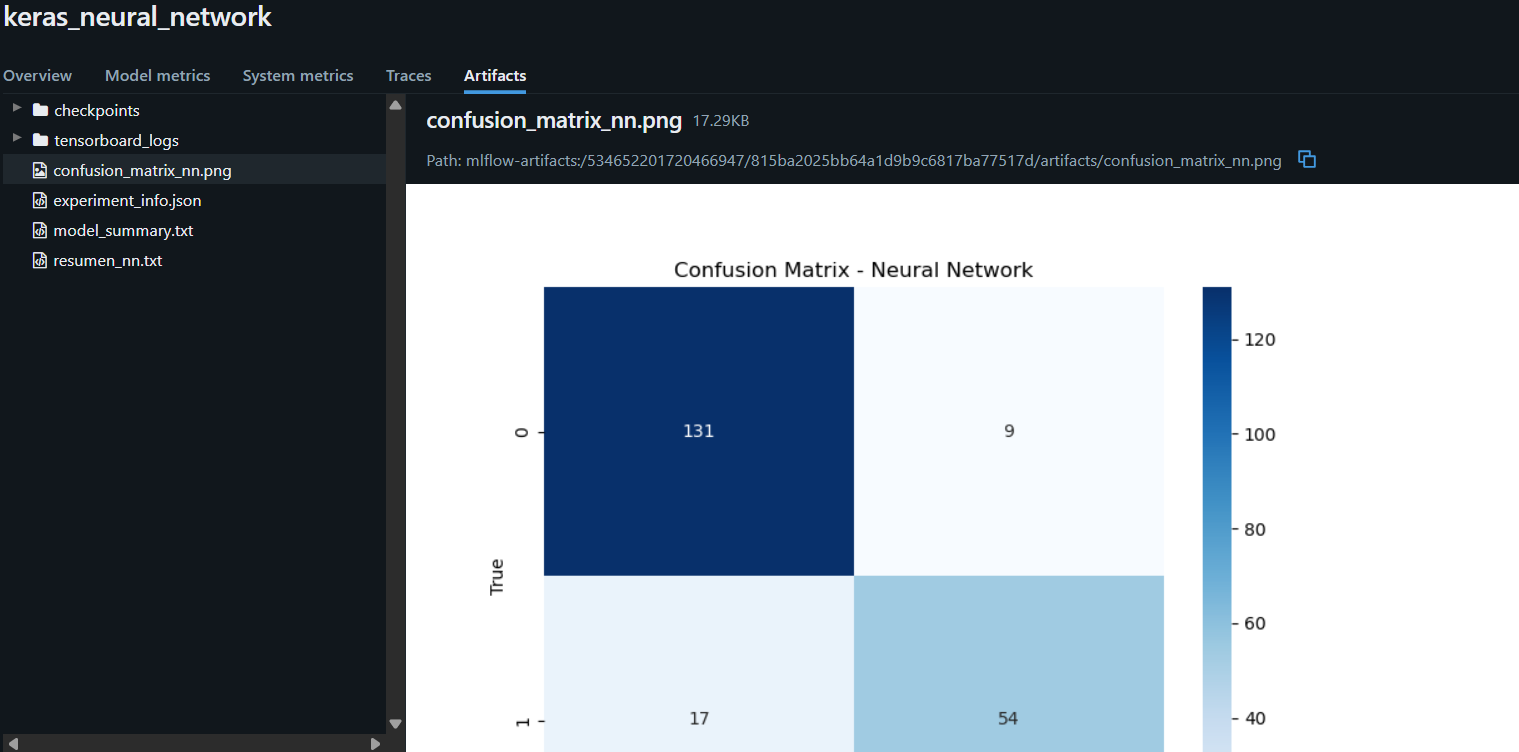
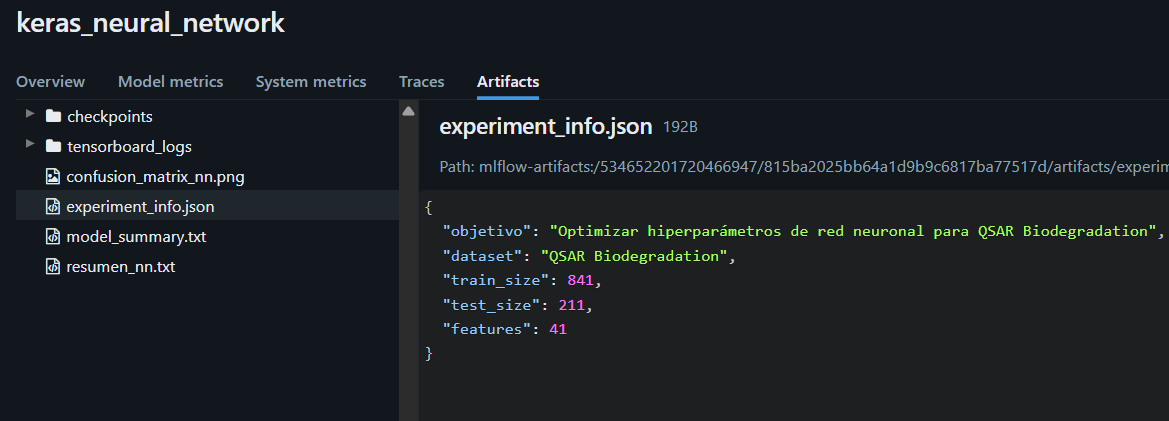
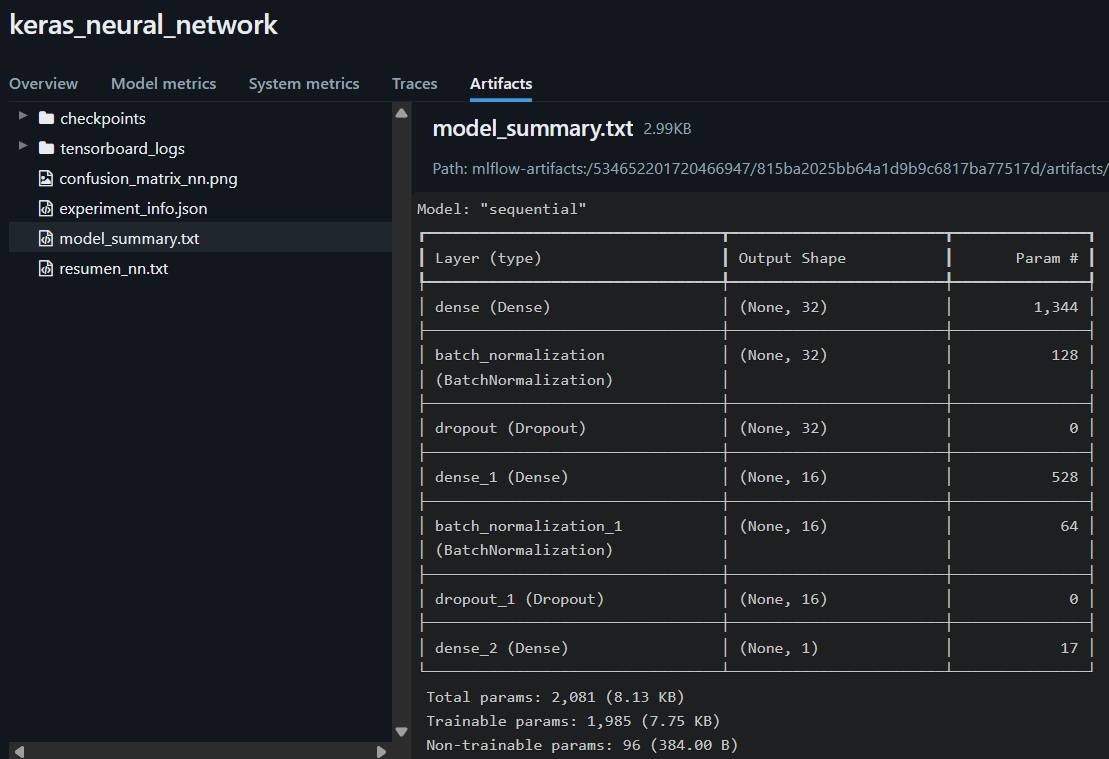

## Interpretación de resultados

#### Los resultados obtenidos mediante los modelos de regresión logística y la red neuronal fueron bastante similares, ya que los valores alcanzados en cada una de las métricas no presentan diferencias significativas. Es importante señalar que, para la regresión logística, se probaron varios parámetros; aunque las combinaciones no fueron numerosas, los valores obtenidos mostraron una variación mínima. Por otro lado, la red neuronal mostró una mejora progresiva durante el entrenamiento y, aunque la diferencia no es muy marcada, en este conjunto de datos se evidencia que supera ligeramente a la regresión logística en la mayoría de las métricas evaluadas.

## Reflexión con ollama

### Al consultar con ollama de manera local fue un proceso lento debido a las relativamente pocas capacidades de la maquina donde se ejecutó, estas fueron las respuestas obtenidas por el modelo llama2: 

##### >>> ¿Qué significa obtener un F1-score de 0.88?

El F1-score es una métrica utilizada en el análisis de datos y la clasificación de sistemas para evaluar la calidad de una      
clasificación. Es el cociente entre la suma del éxito en la predicción correcta y la suma del éxito en la predicción
incorrecta.

En términos generales, un F1-score de 0.88 significa que la clasificación es extremadamente precisa. Un F1-score de 0.88        
indica que el sistema de clasificación tiene un 88% de precisión en su predicción. Esto significa que el sistema de 
clasificación es capaz de distinguir entre los diferentes tipos de datos con una gran cantidad de precisión.

Para poner esto en perspectiva, aquí hay algunas posibles interpretaciones de un F1-score de 0.88:

* Si el sistema de clasificación se utiliza para predicir si un paciente tiene una enfermedad o no, el F1-score de 0.88         
indica que el sistema es capaz de distinguir entre los pacientes enfermos y saludables con una precisión del 88%.
* Si el sistema de clasificación se utiliza para predicir si un cliente es probable que comprueba una transacción o no, el      
F1-score de 0.88 indica que el sistema es capaz de distinguir entre los clientes que comprarán y los que no con una 
precisión del 88%.
* Si el sistema de clasificación se utiliza para predicir si un automóvil tiene un problema mecánico o no, el F1-score de       
0.88 indica que el sistema es capaz de distinguir entre los automóviles con problemas y los que están en buen estado con        
una precisión del 88%.

En resumen, un F1-score de 0.88 es muy alto y indica que el sistema de clasificación es extremadamente preciso en su 
predicción.

>>> ¿Por qué una red neuronal podría tener mejor recall que una regresión logística?

Hay varias razones por las que una red neuronal podría tener mejor recall que una regresión logística:

1. Capacidad de procesamiento de datos no lineales: Las redes neuronales son capaces de procesar datos no lineales y de
alta dimensionalidad, lo que significa que pueden aprender patrones más complejos en los datos. En contrast, la regresión       
logistica es limitada a modelos lineales y puede tener dificultades para modelar funciones no lineales.
2. Aprendizaje de relaciones no linearas: Las redes neuronales pueden aprender relaciones no lineales entre los 
características y el label, lo que les permite capturar patrones más complejos en los datos. En cambio, la regresión 
logística se enfoca en modelar una relación lineal entre las características y el label.
3. No tener restricciones de teoría: Las redes neuronales no están limitadas por las teorías matemáticas de la estadística      
tradicional, lo que les permite aprender patrones más complejos en los datos. En cambio, la regresión logistica está 
limitada por las teorías de la estadística y puede tener dificultades para modelar datos con patrones no lineales.
4. Capacidad de generalización: Las redes neuronales pueden generalizar mejor a nuevos datos, ya que están diseñadas para       
aprender patrones a partir de un conjunto de datos etiquetados. En cambio, la regresión logística puede tener dificultades      
para generalizar a nuevos datos, especialmente si estos son muy diferentes de los datos de entrenamiento.
5. Capacidad de procesamiento de datos impresos: Las redes neuronales pueden procesar datos impresos, como texto o 
imágenes, lo que les permite aprender patrones en estos datos. En cambio, la regresión logistica solo se puede utilizar         
con datos numéricos.
6. No tener dependencia de la distribución de probabilidad: Las redes neuronales no dependen de la distribución de 
probabilidad de los datos, lo que les permite aprender patrones en los datos independientemente de la distribución de
probabilidad. En cambio, la regresión logistica depende de la distribución de probabilidad de los datos y puede tener 
dificultades para modelar datos con una distribución de probabilidad no lineal.
7. Capacidad de aprendizaje profundo: Las redes neuronales pueden aprender patrones en los datos a través de múltiples 
capas ocultas, lo que les permite aprender patrones más complejos. En cambio, la regresión logística solo puede modelar
patrones en un solo nivel.
8. No tener restricciones de sparsidad: Las redes neuronales no tienen restricciones de sparsidad, lo que significa que
pueden aprender patrones en los datos incluso si estos son muy sparse. En cambio, la regresión logística puede tener 
dificultades para modelar datos sparse debido a la necesidad de mantener una relación lineal entre las características y        
el label.
9. Capacidad de procesamiento de datos grandes: Las redes neuronales pueden procesar grandes conjuntos de datos sin
problemas, lo que les permite aprender patrones en grandes conjuntos de datos. En cambio, la regresión logística puede
tener dificultades para modelar conjuntos de datos muy grandes debido a la necesidad de mantener una relación lineal entre      
las características y el label.
10. Capacidad de aprendizaje no supervisado: Las redes neuronales pueden aprender patrones en los datos sin la necesidad        
de etiquetarlos, lo que les permite encontrar patrones ocultos en los datos. En cambio, la regresión logistica solo puede       
modelar patrones en los datos etiquetados.

En resumen, las redes neuronales pueden tener mejor recall que la regresión logística debido a su capacidad de 
procesamiento de datos no lineales, aprendizaje de relaciones no lineales, generalización a nuevos datos, procesamiento de      
datos impresos, independencia de la distribución de probabilidad, aprendizaje profundo, absence of sparsity restrictions,       
y capacidad de procesamiento de grandes conjuntos de datos.

>>> ¿Qué podría mejorar el rendimiento de los modelos Regresión Logística y Red Neuronal  en el dataset QSAR Biodegradation ?   

El dataset QSAR Biodegradation es un conjunto de datos que contiene información sobre la biodegradabilidad de diferentes        
moléculas. El objetivo de un modelo Regresión Logística o Red Neuronal es predecir la biodegradabilidad de una molécula a       
partir de sus características físico-químicas. Sin embargo, los modelos pueden tener dificultades para aprender patrones        
complejos en este dataset debido a varios factores:

1. Baja cantidad de datos: El dataset QSAR Biodegradation contiene solo 100 moléculas, lo que puede limitar la capacidad        
del modelo para aprender patrones complejos. Agregar más datos podría mejorar el rendimiento del modelo.
2. Variedad de características: El dataset contiene diferentes características físico-químicas para cada molécula, como la      
masa molecular, la densidad, la carga y el enlace. Sin embargo, estas características no están correlacionadas con la 
biodegradabilidad, lo que puede dificultar el aprendizaje del modelo.
3. Interacción entre características: Las características físico-químicas de las moléculas pueden interactuar entre sí de       
manera compleja, lo que puede dificultar el aprendizaje del modelo.
4. Falta de representación de los datos: El dataset QSAR Biodegradation no contiene información sobre la estructura 
tridimensional de las moléculas, lo que puede dificultar el aprendizaje del modelo.

Para mejorar el rendimiento de los modelos Regresión Logística y Red Neuronal en este dataset, se pueden considerar las
siguientes estrategias:

1. Agregar más datos: Aumentar la cantidad de datos podría ayudar al modelo a aprender patrones complejos en el dataset.        
Se pueden añadir nuevas moléculas biodegradables y no biodegradables para mejorar la calidad del conjunto de datos.
2. Normalizar las características: Normalizar las características físico-químicas puede ayudar a reducir la varianza entre      
los datos y mejorar el rendimiento del modelo. Se pueden utilizar técnicas de normalización, como standardización o 
z-scoring, para normalizar las características.
3. Añadir características adicionales: Agregar características adicionales, como la estructura tridimensional de las 
moléculas, puede ayudar al modelo a aprender patrones complejos en el dataset. Estas características pueden incluir
información sobre la forma y el tamaño de las moléculas.
4. Utilizar técnicas de agrupación: Agrupar las moléculas según sus características físico-químicas puede ayudar al modelo      
a aprender patrones complejos en el dataset. Se pueden utilizar técnicas de agrupación, como clustering o classification,       
para agrupar las moléculas en diferentes grupos basados en sus características.
5. Utilizar modelos más avanzados: Utilizar modelos más avanzados, como redes neuronales con capas ocultas o modelos de         
árboles de decisión, puede ayudar al modelo a aprender patrones complejos en el dataset. Estos modelos pueden ser capaces       
de aprender patrones no lineales y de alta dimensionalidad en los datos.
6. Utilizar técnicas de preprocesamiento: Utilizar técnicas de preprocesamiento, como normalización o transformaciones 
lineales, para transformar las características físico-químicas antes de entrenar el modelo puede ayudar a reducir la 
varianza entre los datos y mejorar el rendimiento del modelo.
7. Utilizar modelos ensamblados: Utilizar modelos ensamblados, que combinan características de diferentes modelos, puede        
ayudar al modelo a aprender patrones complejos en el dataset. Estos modelos pueden ser capaces de aprender patrones no 
lineales y de alta dimensionalidad en los datos.
8. Utilizar técnicas de agrupación de características: Agrupar las características físico-químicas en diferentes grupos
puede ayudar al modelo a aprender patrones complejos en el dataset. Se pueden utilizar técnicas de agrupación, como 
clustering o classification, para agrupar las características según su similitud.
9. Utilizar modelos de aprendizaje profundo: Utilizar modelos de aprendizaje profundo, que pueden aprender patrones no 
lineales y de alta dimensionalidad en los datos, puede ayudar al modelo a aprender patrones complejos en el dataset. Estos      
modelos pueden incluir redes neuronales o modelos de árboles de decisión.
10. Utilizar técnicas de validación: Utilizar técnicas de validación, como cross-validation, para evaluar el rendimiento        
del modelo en diferentes subsets del dataset puede ayudar a identificar mejoras en el modelo y aumentar su precisión.

En resumen, mejorar el rendimiento de los modelos Regresión Logística y Red Neuronal en el dataset QSAR Biodegradation 
requiere una combinación de estrategias, como agregar más datos, normalizar las características, añadir características         
adicionales, utilizar técnicas de agrupación o ensamblado, utiliza modelos de aprendizaje profundo y técnicas de 
validación.